## Kaggle DataSet of Brooklyn is an Food Stall Dataset.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### Reading of CSV file and checking Columns

In [2]:
data_frame = pd.read_csv('D:/TopMentor/Kaggle DataSets/brooklyn.csv')

In [3]:
data_frame1 = pd.read_csv('D:/TopMentor/Kaggle DataSets/brooklyn.csv')

In [4]:
data_frame.head(30)

,id,date_collected,retailer_type,retailer_detail,food_type,food_detail,label_type,label_language,label_date,approximate_dollar_value,image_id,collection_lat,collection_long,label_explanation
0,5e31d5503b85a2e63d634187,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1872,40.69453,-73.99447,NaN
1,5e31d5643b85a2e63d634188,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1873,40.69453,-73.99447,NaN
2,5e31d8903b85a2e63d634189,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic middle eastern salad,sticker,use by,2020-01-28,10.00,IMG_1874,40.69453,-73.99447,NaN
3,5e31dcee3b85a2e63d63418a,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,6.25,IMG_1875,40.69453,-73.99447,NaN
4,5e31dd273b85a2e63d63418b,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic mexican salad,sticker,use by,2020-01-28,10.00,IMG_1876,40.69453,-73.99447,NaN
5,5e31dda03b85a2e63d63418c,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1877,40.69453,-73.99447,NaN
6,5e31ddb33b85a2e63d63418d,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1879,40.69453,-73.99447,NaN
7,5e31ddd23b85a2e63d63418e,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1880,40.69453,-73.99447,NaN
8,5e31dde13b85a2e63d63418f,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1881,40.69453,-73.99447,NaN
9,5e442b00c435958777371fc6,2020-02-11,health food grocer,"ready-to-eat, shelf-stable, frozen, and perish...",perishable,yogurt,package printed,NaN,2020-02-11,3.99,IMG_1897,40.69335,-73.99150,NaN


### Creating List of Columns to Drop

In [5]:
to_drop = ['id', 'date_collected', 'label_type', 'label_language', 'label_date', 'approximate_dollar_value',
          'image_id', 'collection_lat', 'collection_long', 'label_explanation']

data_frame = data_frame.drop(to_drop, axis = 'columns')

In [6]:
data_frame['food_type'].value_counts()

perishable      102
packaged         49
ready-to-eat     16
shelf stable      4
Name: food_type, dtype: int64

### Handling labels using Label Encoder

In [7]:
label_encoder = LabelEncoder()

In [8]:
data_frame['retailer_type'] = label_encoder.fit_transform(data_frame['retailer_type'])

In [9]:
data_frame['retailer_detail'] = label_encoder.fit_transform(data_frame['retailer_detail'])

In [10]:
data_frame['food_type'] = label_encoder.fit_transform(data_frame['food_type'])

In [11]:
data_frame['food_detail'] = label_encoder.fit_transform(data_frame['food_detail'])

In [12]:
data_frame.head(10)

,retailer_type,retailer_detail,food_type,food_detail
0,3,1,2,49
1,3,1,2,49
2,3,1,2,48
3,3,1,2,49
4,3,1,2,47
5,3,1,0,45
6,3,1,0,45
7,3,1,0,45
8,3,1,0,45
9,5,4,1,83


In [13]:
print(data_frame.food_type.value_counts())
print(data_frame.food_type.values)
print('Package : 0\nPerishable : 1\nRead-to-eat : 2\nShelf Table : 3')

1    102
0     49
2     16
3      4
Name: food_type, dtype: int64
[2 2 2 2 2 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Package : 0
Perishable : 1
Read-to-eat : 2
Shelf Table : 3


In [14]:
data_frame.shape

(171, 4)

### Checking Null Values to Handle Missing values

In [15]:
data_frame.isnull().sum()

retailer_type      0
retailer_detail    0
food_type          0
food_detail        0
dtype: int64

### Checking the Outlier 

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retailer_type'>

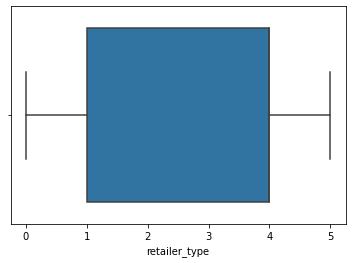

In [16]:
sns.boxplot('retailer_type', data = data_frame) # No Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retailer_detail'>

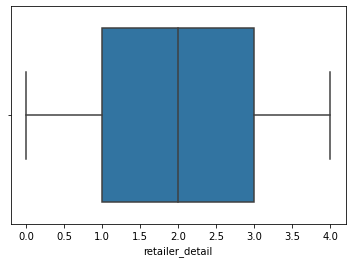

In [17]:
sns.boxplot('retailer_detail', data = data_frame)  # No Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_type'>

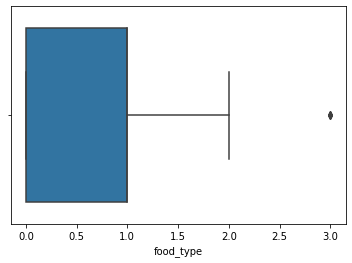

In [18]:
sns.boxplot('food_type', data = data_frame)  # Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='food_detail'>

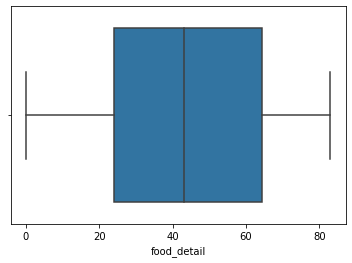

In [19]:
sns.boxplot('food_detail', data = data_frame) # No Outlier

### Some Data Visualization Before Jumping to Model_Selection

### Displots

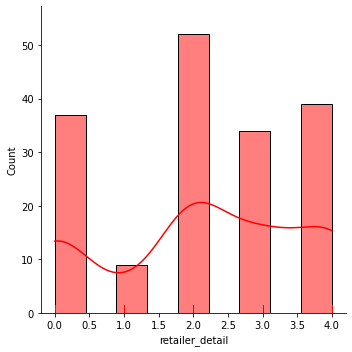

In [20]:
sns.displot(data_frame.retailer_detail, kde = True, color='red', rug=True)

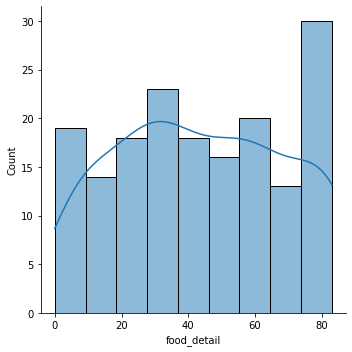

In [21]:
sns.displot(data_frame.food_detail, kde = True)

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

<AxesSubplot:xlabel='food_detail', ylabel='retailer_type'>

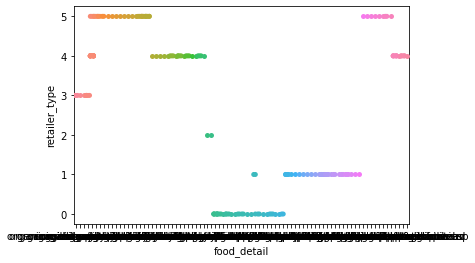

In [22]:
sns.swarmplot(data_frame1.food_detail, data_frame.retailer_type, orient='v')

### Creating IQR (Inter Quartile Range) for Handling Outlier

In [23]:
Q1 = data_frame.quantile(0.25)
Q1

retailer_type       1.0
retailer_detail     1.0
food_type           0.0
food_detail        24.0
Name: 0.25, dtype: float64

In [24]:
Q3 = data_frame.quantile(0.75)
Q3

retailer_type       4.0
retailer_detail     3.0
food_type           1.0
food_detail        64.5
Name: 0.75, dtype: float64

In [25]:
IQR = Q3 - Q1
IQR

retailer_type       3.0
retailer_detail     2.0
food_type           1.0
food_detail        40.5
dtype: float64

### Handling Outlier by using IQR

In [26]:
data1 = data_frame[~((data_frame < (Q1 - 1.5*IQR)) | (data_frame > (Q3 + 1.5*IQR)))]
data1

,retailer_type,retailer_detail,food_type,food_detail
0,3,1,2.0,49
1,3,1,2.0,49
2,3,1,2.0,48
3,3,1,2.0,49
4,3,1,2.0,47
...,...,...,...,...
166,4,2,1.0,36
167,4,2,1.0,36
168,4,2,1.0,24
169,4,2,1.0,36


C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retailer_detail'>

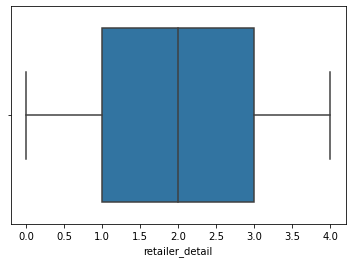

In [27]:
sns.boxplot('retailer_detail', data = data1)

### Checking Correlation 

<AxesSubplot:>

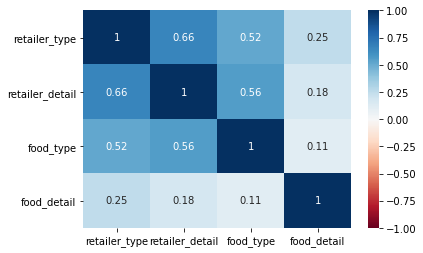

In [28]:
Pearson_corr = data1.corr()
sns.heatmap(Pearson_corr, vmax = 1, vmin = -1, cmap = 'RdBu', annot=True)

<AxesSubplot:xlabel='retailer_type', ylabel='food_type'>

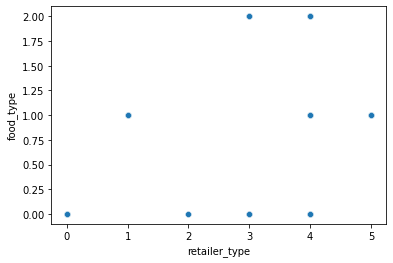

In [29]:
sns.scatterplot(x = 'retailer_type', y = 'food_type', data = data1, palette=('Red', 'Green'))

### Creating X and Y variables for Training and Testing of Data

In [30]:
X = data1.drop('food_type', axis = 'columns')
X

,retailer_type,retailer_detail,food_detail
0,3,1,49
1,3,1,49
2,3,1,48
3,3,1,49
4,3,1,47
...,...,...,...
166,4,2,36
167,4,2,36
168,4,2,24
169,4,2,36


In [31]:
y = data1['food_type']
y

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
166    1.0
167    1.0
168    1.0
169    1.0
170    0.0
Name: food_type, Length: 171, dtype: float64

### Found Some Null values in food_type So Handling of Null Values

In [32]:
y.isnull().sum()  # Checking of Null Values

# Evaluating the Null Values by ffilling 
y = y.fillna(method='ffill')

### Now Training and Testing of Data using Train Test Split method

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Model Creation and Fitting the model

In [34]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [35]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

### Checking Score of All Above Models 

In [37]:
GNB_model.score(X_train, y_train)

0.8088235294117647

In [38]:
DTC_model.score(X_train, y_train)

1.0

In [39]:
RFC_model.score(X_train, y_train)

1.0

### Testing of Predicted Values

In [40]:
predicted = RFC_model.predict(X_test)

In [41]:
predicted

array([0., 1., 1., 0., 2., 1., 1., 1., 0., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 2., 0., 2., 1., 1., 1., 0., 1., 1., 0.,
       0.])

In [44]:
RFC_model.predict([[3,1,49]])

array([2.])

In [45]:
Final_Data = pd.DataFrame({'Actual Values' : y_test, 'Predicted' : predicted})
Final_Data

,Actual Values,Predicted
92,0.0,0.0
113,1.0,1.0
19,1.0,1.0
69,0.0,0.0
53,2.0,2.0
161,1.0,1.0
108,1.0,1.0
14,1.0,1.0
99,0.0,0.0
107,1.0,1.0


### Confusion Matrix 

In [46]:
result = confusion_matrix(y_test, predicted)
result

array([[11,  0,  0],
       [ 0, 20,  1],
       [ 0,  0,  3]], dtype=int64)